In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [124]:
data = pd.read_csv("Data Sheet.csv")

In [125]:
data

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,Minor injury,107,11,27,Male,Heavy Vehicle,2,3.484386,Urban,Yes,Rear-end,No,30,Icy
1,Minor injury,27,16,39,Male,Car,2,3.293091,Rural,Yes,Rear-end,Yes,110,Dry
2,Minor injury,87,14,42,Female,Car,3,3.218911,Urban,No,Rear-end,No,59,Dry
3,Minor injury,43,3,60,Female,Heavy Vehicle,2,3.113012,Rural,No,Rear-end,No,73,Wet
4,Minor injury,72,8,70,Male,T.W,3,3.106580,Urban,Yes,Rear-end,Yes,42,Wet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Fatal crash,112,4,30,Male,Car,1,3.248476,Urban,No,Head-on,No,118,Icy
296,Fatal crash,87,21,52,Female,Heavy Vehicle,2,3.037739,Urban,Yes,Rear-end,No,38,Icy
297,Fatal crash,85,20,79,Female,Heavy Vehicle,2,3.350668,Rural,Yes,Rear-end,No,80,Wet
298,Fatal crash,44,5,23,Female,Car,3,3.419304,Urban,Yes,Rear-end,Yes,47,Wet


In [126]:
data.isna()

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,False,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [127]:
data.isna().sum()

Crash_Severity            0
Vehicle_Speed             0
Crash_Time                0
Age                       0
Gender                    0
Vehicle_Type              0
Number_of_Lanes           0
Lane_Width                0
Road_Type                 0
Alcohol_Consumption       0
Crash_Type                0
Seatbelt_Usage            0
Speed_Limit               0
Road_Surface_Condition    0
dtype: int64

In [128]:
data["Vehicle_Type"].value_counts()

Vehicle_Type
Car              107
Heavy Vehicle    105
T.W               88
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

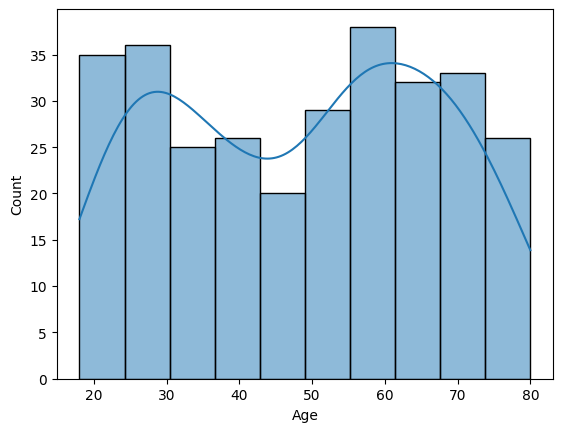

In [129]:
Age = data["Age"]
sns.histplot(data=Age, kde=True)

In [130]:
#Creating a lambda function to create numerical class values
data['Crash_Severity'].value_counts()

Crash_Severity
Minor injury    100
Major injury    100
Fatal crash     100
Name: count, dtype: int64

In [131]:
data['Crash_Severity'].dtype

dtype('O')

In [132]:
data['Crash_Severity'] = data['Crash_Severity'].apply(

    lambda x: 0 if x=="Minor injury" 
              else 1 if x=="Major Injury"
              else 2
).astype(int)

In [133]:
data

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,0,107,11,27,Male,Heavy Vehicle,2,3.484386,Urban,Yes,Rear-end,No,30,Icy
1,0,27,16,39,Male,Car,2,3.293091,Rural,Yes,Rear-end,Yes,110,Dry
2,0,87,14,42,Female,Car,3,3.218911,Urban,No,Rear-end,No,59,Dry
3,0,43,3,60,Female,Heavy Vehicle,2,3.113012,Rural,No,Rear-end,No,73,Wet
4,0,72,8,70,Male,T.W,3,3.106580,Urban,Yes,Rear-end,Yes,42,Wet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2,112,4,30,Male,Car,1,3.248476,Urban,No,Head-on,No,118,Icy
296,2,87,21,52,Female,Heavy Vehicle,2,3.037739,Urban,Yes,Rear-end,No,38,Icy
297,2,85,20,79,Female,Heavy Vehicle,2,3.350668,Rural,Yes,Rear-end,No,80,Wet
298,2,44,5,23,Female,Car,3,3.419304,Urban,Yes,Rear-end,Yes,47,Wet


## Dividing the crash time into 4 intervals for better and interpretation

0 -> 0 to 6, ie 1 am to 6 am (Late Night)

1 -> 7 to 11, ie 7 am to 11 pm (Morning)

2 -> 12 to 4, ie 12 pm to 4 pm (Afternoon)

3 -> 5 to 8, ie 5 pm to 8 pm (Evening)

4 ->  9 to 12, ie 9pm to 12pm (Night)

In [135]:

data['Crash_Time'] = data['Crash_Time'].apply(

    lambda x: 0 if (x>=0 and x<=6)
              else 1 if (x>=7 and x<=11)
              else 2 if (x>=12 and x<=16)
              else 3 if (x>=17 and x<=20)
              else 4
)

data['Crash_Time'].value_counts()

Crash_Time
0    88
2    67
1    58
3    55
4    32
Name: count, dtype: int64

## Converting Road conditions into numeric values

0 -> Wet

1 -> Icy

2 -> Dry

In [136]:
data['Road_Surface_Condition'] = data['Road_Surface_Condition'].apply(

    lambda x: 0 if x=='Wet'
              else 1 if x=='Icy'
              else 2
).astype(int)

data['Road_Surface_Condition']

0      1
1      2
2      2
3      0
4      0
      ..
295    1
296    1
297    0
298    0
299    0
Name: Road_Surface_Condition, Length: 300, dtype: int64

In [137]:
data['Crash_Type'] = data['Crash_Type'].apply(

    lambda x: 0 if x=='Rear-end'
              else 1
).astype(int)

data['Crash_Type']

0      0
1      0
2      0
3      0
4      0
      ..
295    1
296    0
297    0
298    0
299    1
Name: Crash_Type, Length: 300, dtype: int64

In [138]:
data['Alcohol_Consumption'] = data['Alcohol_Consumption'].apply(

    lambda x: 0 if x=='No'
              else 1
).astype(int)

data['Alcohol_Consumption']

0      1
1      1
2      0
3      0
4      1
      ..
295    0
296    1
297    1
298    1
299    1
Name: Alcohol_Consumption, Length: 300, dtype: int64

In [149]:
data['Gender'] = data['Gender'].apply(

    lambda x: 0 if x=='Male'
              else 1
).astype(int)

data['Seatbelt_Usage'] = data['Seatbelt_Usage'].apply(

    lambda x: 0 if x=='No'
              else 1
).astype(int)

data['Road_Type'] = data['Road_Type'].apply(

    lambda x: 0 if x=='Rural'
              else 1
).astype(int)



<Axes: >

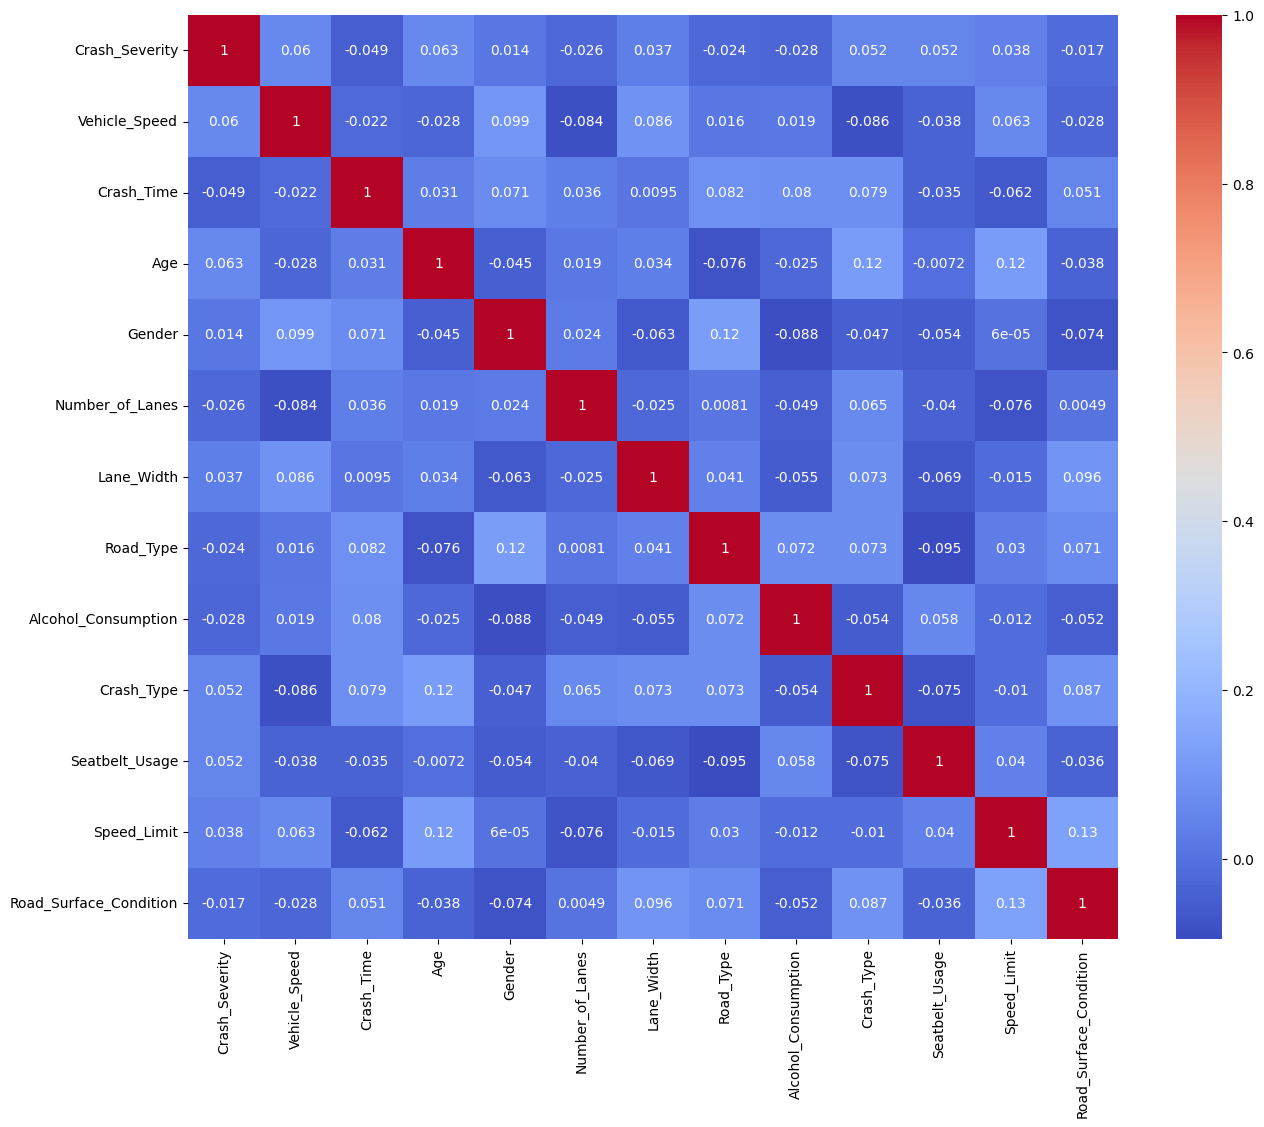

In [150]:
correl = data.corr(numeric_only=True)
pt.figure(figsize=(15, 12))
sns.heatmap(annot=True, data=correl, cmap="coolwarm")